<a href="https://colab.research.google.com/github/kiranmuloor/DataScience/blob/master/CNN/4_keras_cats_dogs_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
train_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/dogs-vs-cats_small/train"
validation_dir="/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/dogs-vs-cats_small/validation"

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

model.save('/content/drive/My Drive/Datascience/ClassWork/DeepLearning/CNN/cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 206s 2s/step - loss: 0.6587 - acc: 0.6100 - val_loss: 0.6381 - val_acc: 0.6260
Epoch 2/30
100/100 [==============================] - 431s 4s/step - loss: 0.6272 - acc: 0.6525 - val_loss: 0.6653 - val_acc: 0.6810
Epoch 3/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5925 - acc: 0.6785 - val_loss: 0.5528 - val_acc: 0.7000
Epoch 4/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5631 - acc: 0.7140 - val_loss: 0.5815 - val_acc: 0.7060
Epoch 5/30
100/100 [==============================] - 11s 111ms/step - loss: 0.5325 - acc: 0.7275 - val_loss: 0.5839 - val_acc: 0.6940
Epoch 6/30
100/100 [==============================] - 11s 113ms/step - loss: 0.5181 - acc: 0.7470 - val_loss: 0.5409 - val_acc: 0.7250
Epoch 7/30
100/100 [==============================] - 11s 111ms/step - loss: 0.4801 - acc: 0.7670 - val_loss: 0.4847 - val_acc: 0.7400
Epoch 8/30
100/100 [==============================] - 11s 1

In [9]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5, 1.0, 'Training and validation accuracy')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Training and validation loss')

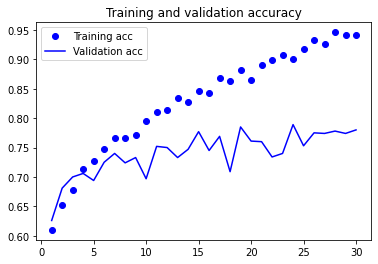

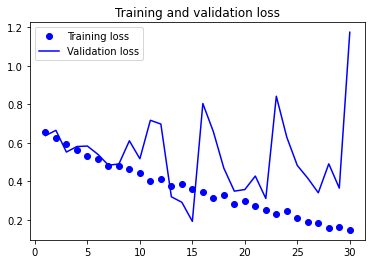

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()